In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [37]:
df1=pd.read_csv('marketing_data_f.csv')
df1.head()

,ID,Year_Birth,Education,Marital_Status,Y_income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [ ]:
#### 1. After importing the data, examine variables such as Dt_Customer and Income to verify their accurate importation.

In [38]:
df1.rename(columns={'Y_income ':'Income'}, inplace=True)

In [39]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [41]:
df1['Dt_Customer']=pd.to_datetime(df1['Dt_Customer'])

C:\Users\anees\AppData\Local\Temp\ipykernel_6336\2322259538.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Dt_Customer']=pd.to_datetime(df1['Dt_Customer'])


In [42]:
df1['Income']=df1['Income'].str.replace('$','')
df1['Income']=df1['Income'].str.replace(',','')

In [43]:
df1['Income']=df1['Income'].astype(float)

In [44]:
df1.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US


In [ ]:
#### 2. There are missing income values for some customers. Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average.

In [46]:
df1.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [47]:
df1.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [49]:
df1['Income']=df1.groupby(['Education','Marital_Status'])['Income'].transform(lambda x: x.fillna(x.median()))

In [51]:
df1.Income.isna().sum()

0

In [ ]:
#### 3.Create variables to represent the total number of children, age, and total spending.

In [57]:
df1['Total_Children']=df1['Kidhome']+df1['Teenhome']
df1['Total_Spending']=df1['MntWines']+df1['MntFruits']+df1['MntMeatProducts']+df1['MntFishProducts']+df1['MntSweetProducts']+df1['MntGoldProds']
df1['Total_Purchases']=df1['NumDealsPurchases']+df1['NumWebPurchases']+df1['NumCatalogPurchases']+df1['NumStorePurchases']

In [58]:
df1.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Total_Spending,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,577,18


In [60]:
from datetime import datetime
current_year=datetime.now().year
df1['Age']=current_year-df1['Year_Birth']

In [61]:
df1.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Total_Spending,Total_Purchases,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,1190,15,55
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,577,18,64


In [ ]:
#### 4.Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.

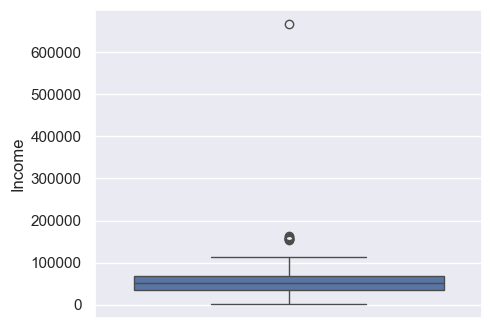

In [66]:
sns.set(rc={'figure.figsize':(5,4)})
sns.boxplot(df1['Income'])
plt.show()

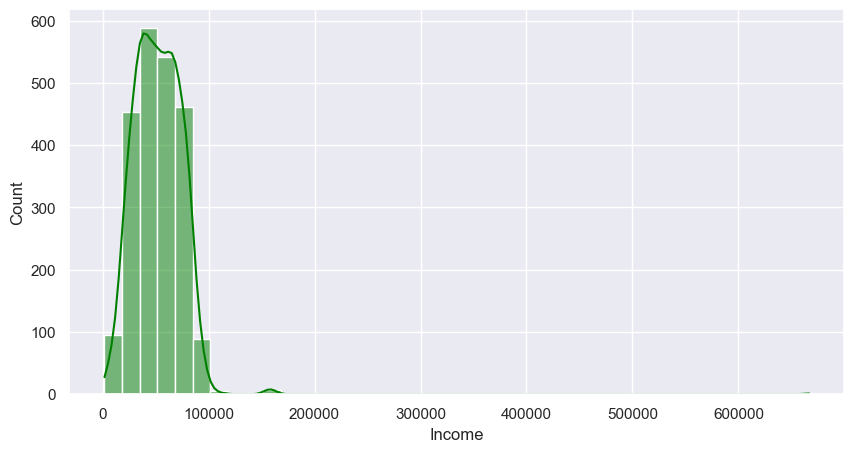

In [75]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(df1['Income'],bins=40,kde=True,color='Green')
plt.show()

In [77]:
df1.drop(df1[(df1['Income']>600000)].index,inplace=True)

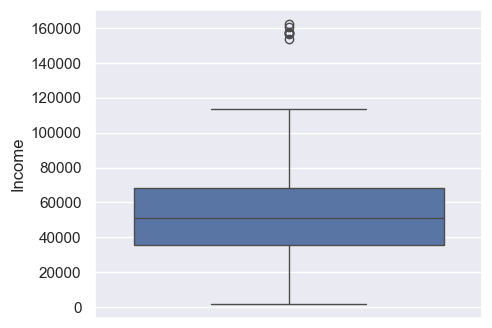

In [78]:
sns.set(rc={'figure.figsize':(5,4)})
sns.boxplot(df1['Income'])
plt.show()

## We can observe, there is an extreme outlier in the Income variable,so we droppped that row

In [ ]:
#### 5.Apply ordinal and one-hot encoding based on the various types of categorical variables

In [79]:
df1.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [80]:
order=list(['Basic','2n Cycle','Graduation','Master','PhD'])

In [83]:
df1['Education']=pd.Categorical(df1['Education'],categories=order,ordered=True).codes

In [84]:
df1.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [86]:
df1=pd.get_dummies(df1,columns=['Marital_Status'])

In [87]:
df1.head(3)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Total_Spending,Total_Purchases,Age,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1826,1970,2,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,1190,15,55,False,False,True,False,False,False,False,False
1,1,1961,2,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,577,18,64,False,False,False,False,True,False,False,False
2,10476,1958,2,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,251,11,67,False,False,False,True,False,False,False,False


In [ ]:
#### 6.Generate a heatmap to illustrate the correlation between different pairs of variables.

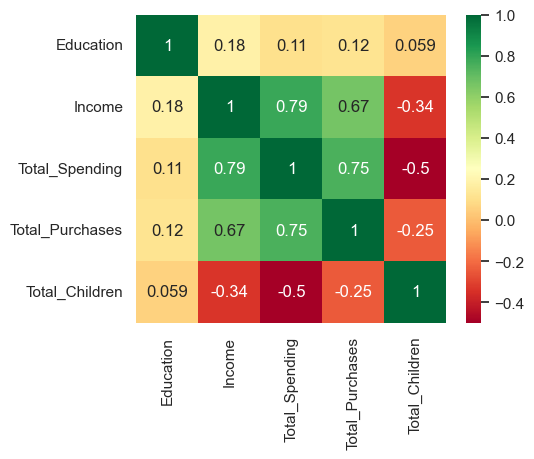

In [95]:
sns.heatmap(df1[['Education','Income','Total_Spending','Total_Purchases','Total_Children']].corr(),annot=True,cmap='RdYlGn')
plt.show()

## We can infer that, people with high income-have less children and spend and purchase more.

In [ ]:
#### 7.a.Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.

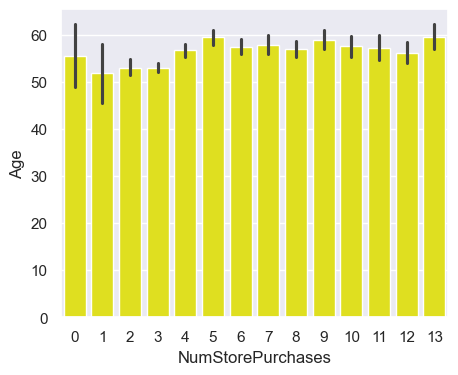

In [101]:
sns.barplot(x=df1['NumStorePurchases'],y=df1['Age'],color='Yellow')
plt.show()

## We can infer that older individuals, aroud the age of 60 prefer store purchases

In [ ]:
#### 7b.Customers with children likely experience time constraints, making online shopping a more convenient option.

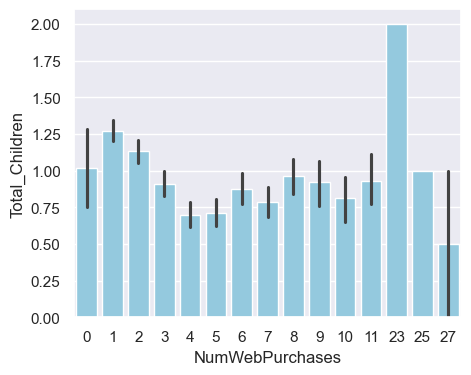

In [104]:
sns.barplot(x=df1['NumWebPurchases'],y=df1['Total_Children'],color='Skyblue')
plt.show()

## We can see that customers with more children prefer web purchase, that doesn't conclude that customers who does more web purchases have more children.

In [106]:
#### 7c.Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

In [107]:
df1.head(2)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Total_Spending,Total_Purchases,Age,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1826,1970,2,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,1190,15,55,False,False,True,False,False,False,False,False
1,1,1961,2,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,577,18,64,False,False,False,False,True,False,False,False


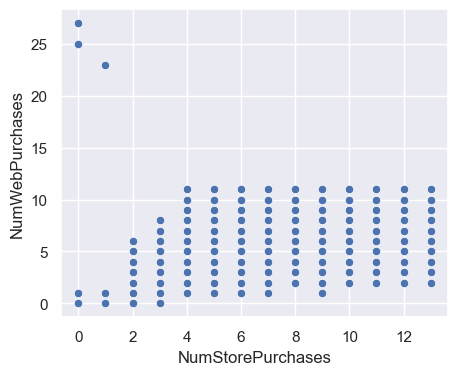

In [114]:
sns.scatterplot(x=df1['NumStorePurchases'],y=df1['NumWebPurchases'])
plt.show()

## We can say that sales at physical stores do not face  the risk of cannibalization by alternative distribution channels.

In [116]:
#### 7d.Does the United States significantly outperform the rest of the world in total purchase volumes?

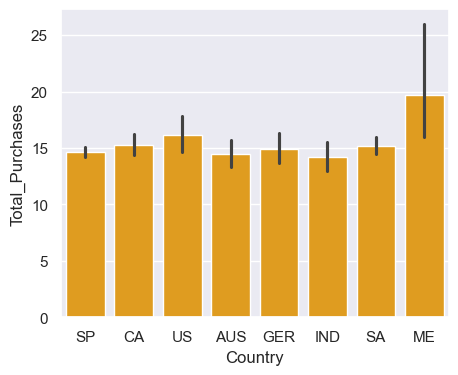

In [117]:
sns.barplot(x=df1['Country'],y=df1['Total_Purchases'],color='Orange')
plt.show()

##  We can infer that, it is 'ME', but not the 'US' which  outperforms the total purchase volume

In [118]:
#### 8.a.Identify the top-performing products and those with the lowest revenue.

In [119]:
df1.head(3)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Total_Spending,Total_Purchases,Age,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1826,1970,2,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,1190,15,55,False,False,True,False,False,False,False,False
1,1,1961,2,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,577,18,64,False,False,False,False,True,False,False,False
2,10476,1958,2,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,251,11,67,False,False,False,True,False,False,False,False


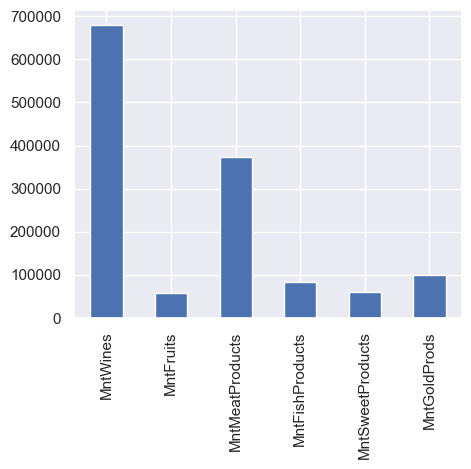

In [120]:
df1[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().plot.bar()
plt.show()

## We can infer that, top performing product is 'Wines' and lowest is 'Fruits,Sweet prodcuts'

In [122]:
#### 8b.Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

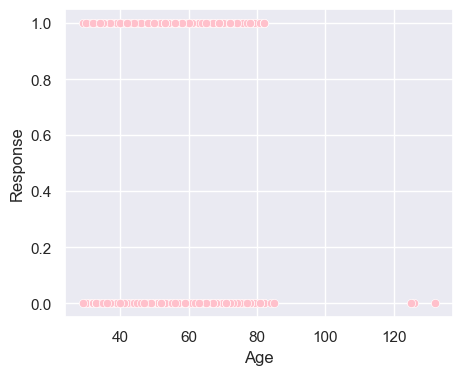

In [126]:
sns.scatterplot(x=df1['Age'],y=df1['Response'],color='Pink')
plt.show()

## We can infer that there is no correlation betweeen Age and Response vaibles

In [127]:
#### 8c.Determine the country with the highest number of customers who accepted the last campaign.

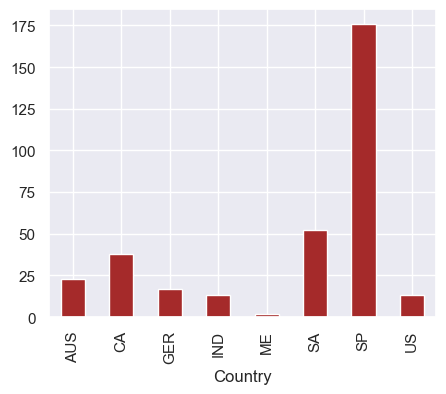

In [129]:
df1.groupby(['Country'])['Response'].sum().plot(kind='bar',color='brown')
plt.show()

## We can infer that 'SP' has more customers who accepted the last campaign.

In [131]:
#### 8d.Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

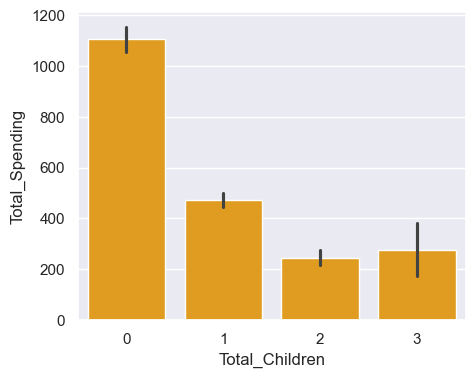

In [133]:
sns.barplot(x=df1['Total_Children'],y=df1['Total_Spending'],color='orange')
plt.show()

## We can infer that customers with less children spend more.

In [135]:
#### 8e.Analyze the educational background of customers who lodged complaints in the last two years.

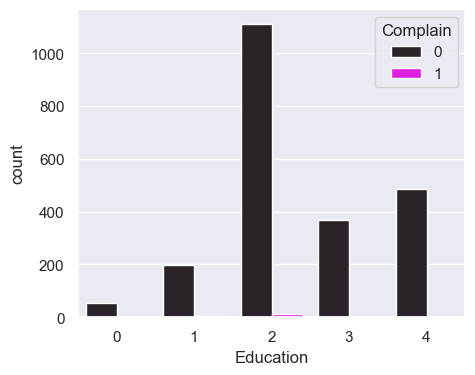

In [141]:
sns.countplot(x=df1['Education'],hue=df1['Complain'],palette='dark:magenta')
plt.show()

## We Can infer that graduates lodged more complaints in the last two years.

### From the above inferences, we can say that:
* Customers with high income and less children, spend more.
* Older individuals, around the age of 60 prefer store purchases.
* Customers with more children prefer web purchases.
* 'ME' has more purchase volume: ME>US>CA>SA>GR>SP>AUS>IND.
* Most selling product is 'Wines' and lowest is 'Fruits & Sweet prodcuts' :Wines>Meat>Gold>Fish>Sweet&Fish
* Graduates lodged more complaints in the last two years